<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning-UAS/blob/main/Chapter_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [1]:
# Cek versi Python dan scikit-learn
import sys
from packaging import version
import sklearn

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Konfigurasi tampilan plot
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

# Direktori penyimpanan gambar
from pathlib import Path
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Fungsi untuk menyimpan gambar
def save_fig(fig_id, tight=True, ext="png", dpi=300):
    plt.tight_layout() if tight else None
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

## Regresi Linear

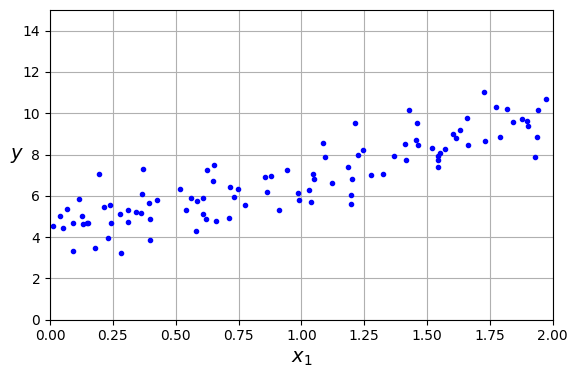

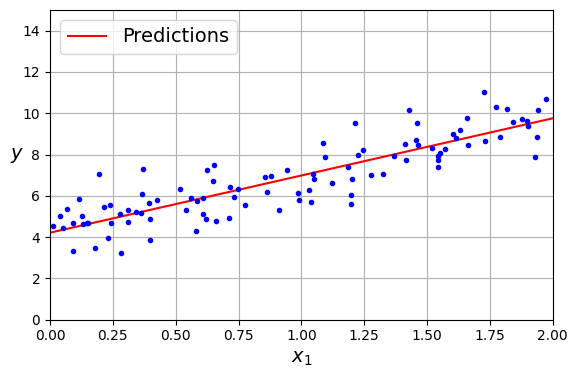


Intercept dan koefisien: [4.21509616] [[2.77011339]]
Prediksi dengan sklearn: [[4.21509616]
 [9.75532293]]
Theta (SVD): [[4.21509616]
 [2.77011339]]
Theta (pinv): [[4.21509616]
 [2.77011339]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import add_dummy_feature
from pathlib import Path

# Konfigurasi
np.random.seed(42)
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Generate data
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Plot data
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

# Linear Regression Manual (Normal Equation)
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Prediksi
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best

# Plot prediksi
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")
plt.show()

# Linear Regression dengan Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("\nIntercept dan koefisien:", lin_reg.intercept_, lin_reg.coef_)
print("Prediksi dengan sklearn:", lin_reg.predict(X_new))

# Linear Regression dengan SVD
theta_best_svd, *_ = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta (SVD):", theta_best_svd)

# Pseudo-inverse
print("Theta (pinv):", np.linalg.pinv(X_b) @ y)


# **Gradient Descent**

## Batch Gradien Descent

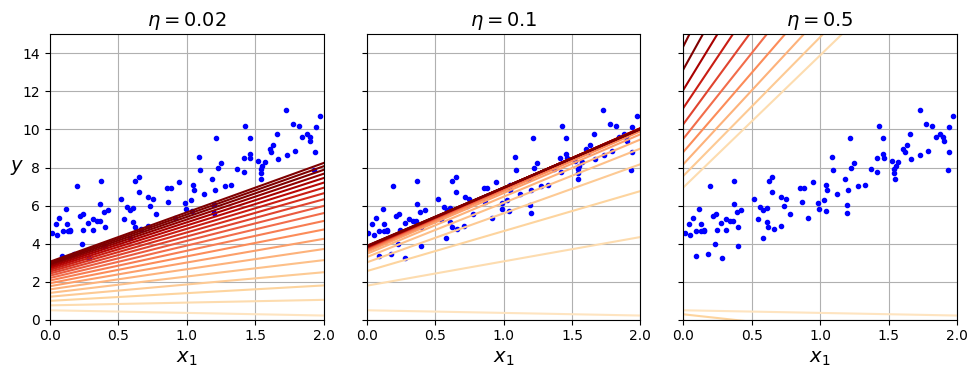

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

# Setup direktori penyimpanan
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Dataset
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Tambahkan x0 = 1
X_b = np.c_[np.ones((m, 1)), X]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Gradient Descent (dengan visualisasi lintasan)
def plot_gradient_descent(theta_init, eta):
    theta = theta_init.copy()
    theta_path = []
    plt.plot(X, y, "b.")
    for epoch in range(1000):
        if epoch < 20:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / 20 + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta -= eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

# Plot 3 learning rate
np.random.seed(42)
theta_start = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta_start, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
plot_gradient_descent(theta_start, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plot_gradient_descent(theta_start, eta=0.5)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("gradient_descent_plot")
plt.show()


## Stochastic Gradient Descent

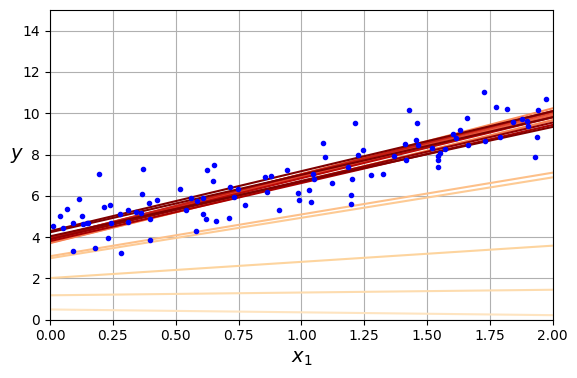

Theta (manual SGD): [4.21076011 2.74856079]
Intercept (SGDRegressor): [4.21278812]
Koefisien (SGDRegressor): [2.77270267]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import SGDRegressor
from pathlib import Path

# Direktori penyimpanan gambar
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Dataset
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Tambah x0 = 1 untuk intercept
X_b = np.c_[np.ones((m, 1)), X]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# SGD Manual
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t): return t0 / (t + t1)

theta_path_sgd = []
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(6, 4))
for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < 20:
            y_pred = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / 20 + 0.15))
            plt.plot(X_new, y_pred, color=color)

        rand_i = np.random.randint(m)
        xi = X_b[rand_i:rand_i+1]
        yi = y[rand_i:rand_i+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta -= eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

# Hasil theta manual SGD
print("Theta (manual SGD):", theta.ravel())

# SGD dengan Scikit-Learn
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,
                       eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

print("Intercept (SGDRegressor):", sgd_reg.intercept_)
print("Koefisien (SGDRegressor):", sgd_reg.coef_)


## Mini-batch gradient descent

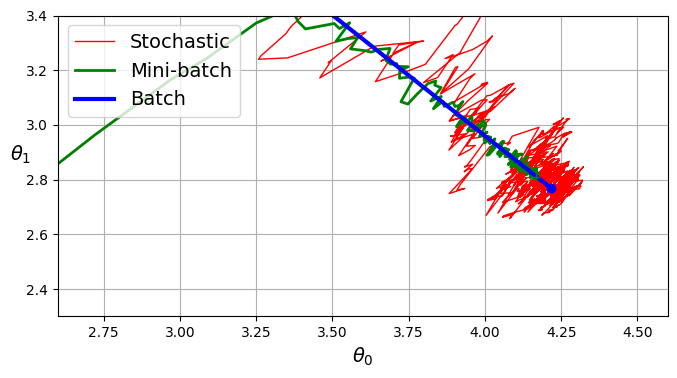

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from math import ceil

# Direktori & fungsi simpan gambar
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Generate data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

# Learning schedule
t0, t1 = 5, 50
def learning_schedule(t): return t0 / (t + t1)

# --- Batch Gradient Descent (BGD) ---
eta = 0.1
n_epochs_bgd = 1000
theta_bgd = np.random.randn(2, 1)
theta_path_bgd = []

for epoch in range(n_epochs_bgd):
    gradients = 2 / m * X_b.T @ (X_b @ theta_bgd - y)
    theta_bgd -= eta * gradients
    theta_path_bgd.append(theta_bgd.copy())

# --- Stochastic Gradient Descent (SGD) ---
n_epochs_sgd = 50
theta_sgd = np.random.randn(2, 1)
theta_path_sgd = []

for epoch in range(n_epochs_sgd):
    for i in range(m):
        rand_i = np.random.randint(m)
        xi = X_b[rand_i:rand_i+1]
        yi = y[rand_i:rand_i+1]
        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)
        eta_sgd = learning_schedule(epoch * m + i)
        theta_sgd -= eta_sgd * gradients
        theta_path_sgd.append(theta_sgd.copy())

# --- Mini-Batch Gradient Descent (MGD) ---
n_epochs_mgd = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)
theta_mgd = np.random.randn(2, 1)
theta_path_mgd = []

for epoch in range(n_epochs_mgd):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(n_batches_per_epoch):
        idx = i * minibatch_size
        xi = X_b_shuffled[idx:idx + minibatch_size]
        yi = y_shuffled[idx:idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta_mgd - yi)
        eta_mgd = learning_schedule(epoch * n_batches_per_epoch + i)
        theta_mgd -= eta_mgd * gradients
        theta_path_mgd.append(theta_mgd.copy())

# Konversi ke array
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# --- Plot Jalur Optimisasi ---
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-", linewidth=3, label="Batch")

# Titik akhir masing-masing
plt.plot(theta_path_sgd[-1, 0], theta_path_sgd[-1, 1], "rs")
plt.plot(theta_path_mgd[-1, 0], theta_path_mgd[-1, 1], "g+")
plt.plot(theta_path_bgd[-1, 0], theta_path_bgd[-1, 1], "bo")

plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()


## Polynomial Regression

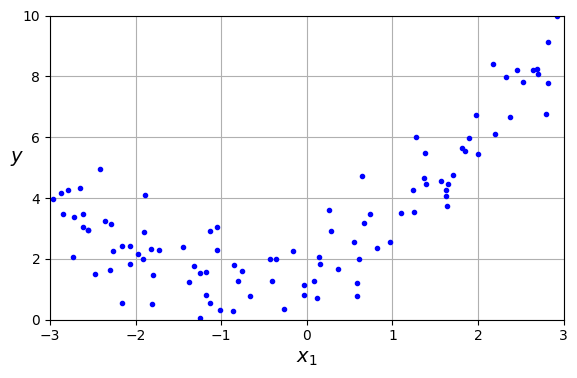

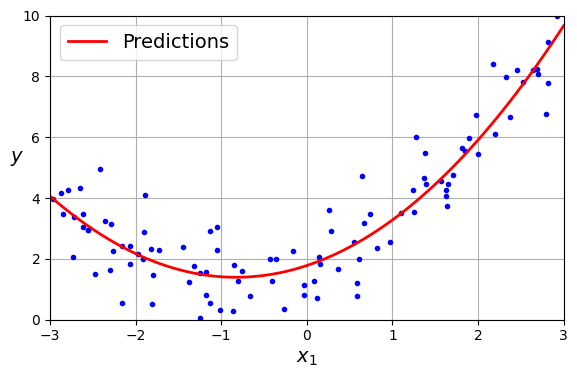

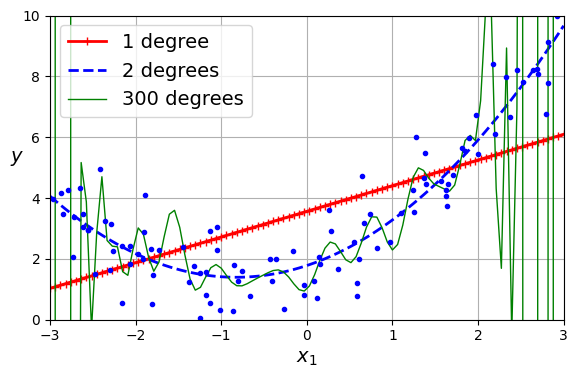

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from pathlib import Path

# Setup direktori penyimpanan
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Data kuadratik dengan noise
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3  # rentang [-3, 3]
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Plot data
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

# Polynomial regression (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Prediksi
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Plot prediksi polynomial degree 2
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

# Perbandingan degree 1, 2, dan 300
plt.figure(figsize=(6, 4))
for style, width, degree in [("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)]:
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )
    model.fit(X, y)
    y_pred = model.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_pred, style, linewidth=width, label=label)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()


## Learning Curve

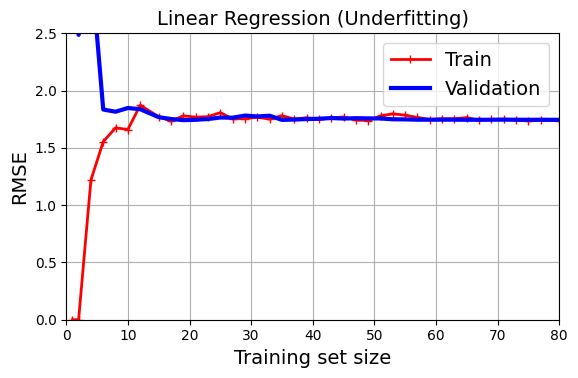

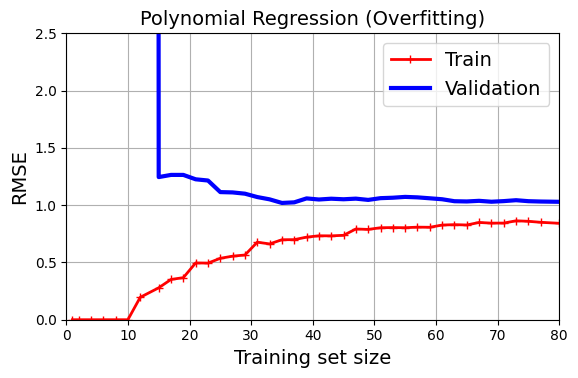

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from pathlib import Path

# Direktori penyimpanan
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Fungsi plotting learning curve
def plot_learning_curve(model, X, y, label, fig_name):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
        scoring="neg_root_mean_squared_error")

    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Train")
    plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title(label)
    plt.grid()
    plt.legend(loc="upper right")
    plt.axis([0, 80, 0, 2.5])
    save_fig(fig_name)
    plt.show()

# Learning curve: LinearRegression (underfitting)
plot_learning_curve(LinearRegression(), X, y, "Linear Regression (Underfitting)", "underfitting_learning_curves_plot")

# Learning curve: Polynomial Regression degree=10 (overfitting)
poly_reg_10 = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())
plot_learning_curve(poly_reg_10, X, y, "Polynomial Regression (Overfitting)", "learning_curves_plot")


# **Model Linier dengan Regularisasi**

## Ridge Regression

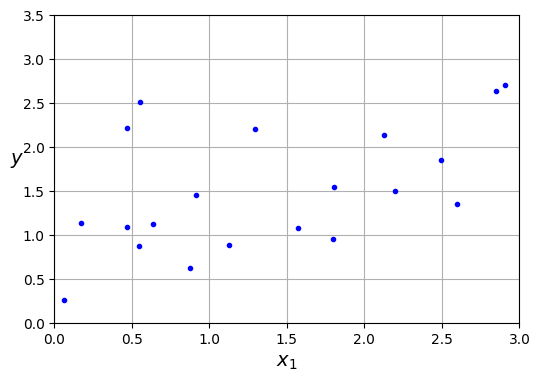


Prediksi Ridge (alpha=0.1) untuk x=1.5: [1.55325833]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from pathlib import Path

# Direktori penyimpanan
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Generate data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# Visualisasi data
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

# Ridge Regression sederhana
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
print("\nPrediksi Ridge (alpha=0.1) untuk x=1.5:", ridge_reg.predict([[1.5]]))

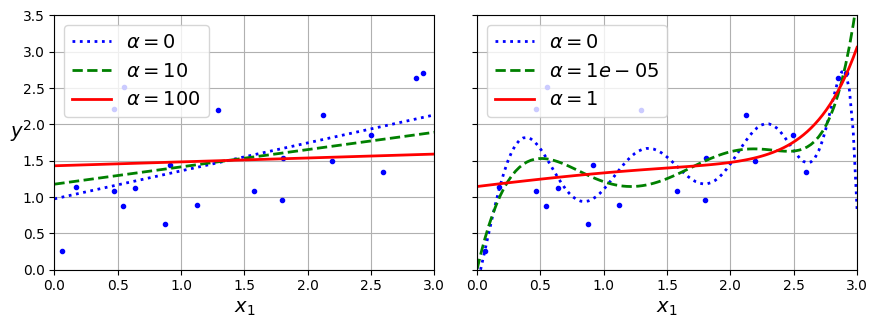


SGDRegressor prediksi untuk x=1.5: [1.55302613]
Ridge (solver='sag') prediksi untuk x=1.5: [1.55326019]
Closed-form Ridge theta: [0.97898394 0.3828496 ]
Ridge intercept & coef (sag): [0.97896386] [0.38286422]


In [9]:
# Fungsi plotting model Ridge
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_pred = model.predict(X_new)
        plt.plot(X_new, y_pred, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

# Plot: Ridge Linear vs Polynomial
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 1e-5, 1))
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

# Ridge via SGDRegressor (penalty="l2" sama dengan Ridge)
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
print("\nSGDRegressor prediksi untuk x=1.5:", sgd_reg.predict([[1.5]]))

# Ridge dengan solver="sag" (Stochastic Average Gradient)
ridge_reg_sag = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg_sag.fit(X, y)
print("Ridge (solver='sag') prediksi untuk x=1.5:", ridge_reg_sag.predict([[1.5]]))

# Closed-form Ridge dengan regularisasi hanya pada koefisien (bukan bias)
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])  # regulasi hanya untuk theta_1
X_b = np.c_[np.ones((m, 1)), X]     # tambah bias
theta_closed = np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y
print("Closed-form Ridge theta:", theta_closed.ravel())

# Bandingkan dengan model hasil fit
print("Ridge intercept & coef (sag):", ridge_reg_sag.intercept_, ridge_reg_sag.coef_)

## Lasso Regression

Lasso prediksi untuk x=1.5: [1.53788174]


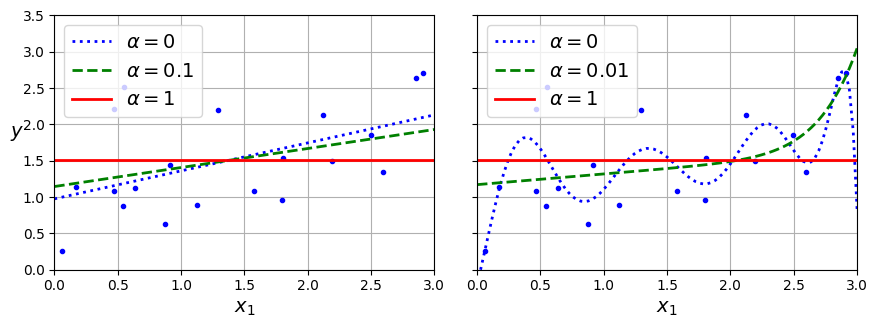

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from pathlib import Path

# Setup penyimpanan gambar
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight: plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# Data sederhana
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# Lasso prediksi sederhana
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print("Lasso prediksi untuk x=1.5:", lasso_reg.predict([[1.5]]))

# Fungsi plot model
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        model = model_class(alpha=alpha, **model_kwargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X, y)
        y_pred = model.predict(X_new)
        plt.plot(X_new, y_pred, style, linewidth=2, label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

# Visualisasi Lasso linear & polynomial
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()


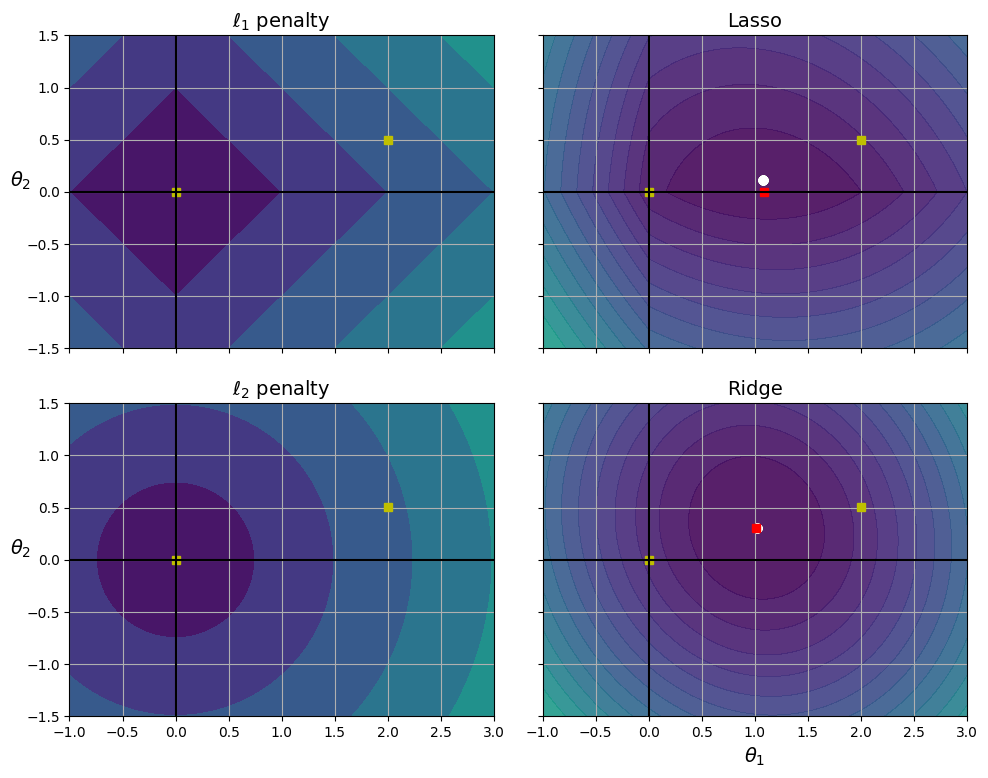

In [11]:
# Perbandingan penalti L1 (Lasso) dan L2 (Ridge)
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5
t1s, t2s = np.linspace(t1a, t1b, 500), np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]
J = ((T @ Xr.T - yr.T) ** 2).mean(axis=1).reshape(t1.shape)
N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

# Titik minimum J dan J+penalty
t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iter=200):
    path = [theta]
    for _ in range(n_iter):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta -= eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, figsize=(10.1, 8), sharex=True, sharey=True)
for i, (N, l1, l2, title) in enumerate([(N1, 2.0, 0, "Lasso"), (N2, 0, 2.0, "Ridge")]):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2
    tr_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_idx], t2[tr_idx]

    levelsJR = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJR = levelsJR * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(np.array([[0.25], [-1]]), Xr, yr, 0, 0)
    path_JR = bgd_path(np.array([[0.25], [-1]]), Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, l1=np.sign(l1)/3, l2=np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.contourf(t1, t2, N / 2, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot([0, t1_min], [0, t2_min], "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.grid()
    ax.axhline(0, color="k")
    ax.axvline(0, color="k")

    ax = axes[i, 1]
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot([0, t1_min], [0, t2_min], "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.grid()
    ax.axhline(0, color="k")
    ax.axvline(0, color="k")

    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    axes[i, 0].set_ylabel(r"$\theta_2$", rotation=0)

save_fig("lasso_vs_ridge_plot")
plt.show()


## Elastic Net dan Early Stopping

ElasticNet prediksi untuk x=1.5: [1.54333232]


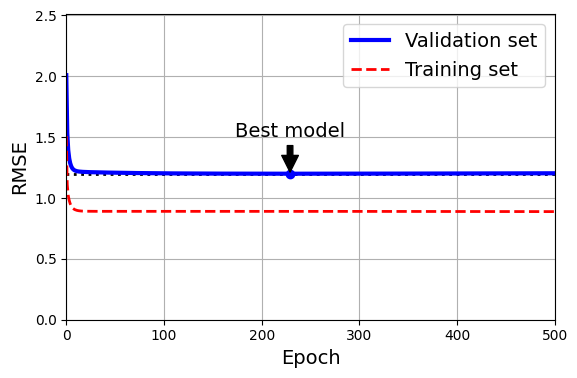

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from pathlib import Path

# Fungsi RMSE alternatif agar kompatibel
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Setup penyimpanan gambar
IMAGES_PATH = Path("images/training_linear_models")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight=True, ext="png", dpi=300):
    if tight:
        plt.tight_layout()
    plt.savefig(IMAGES_PATH / f"{fig_id}.{ext}", format=ext, dpi=dpi)

# ===================== Contoh ElasticNet =====================
np.random.seed(42)
X = 3 * np.random.rand(20, 1)
y = 1 + 0.5 * X + np.random.randn(20, 1) / 1.5

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print("ElasticNet prediksi untuk x=1.5:", elastic_net.predict([[1.5]]))

# ===================== Dataset untuk Early Stopping =====================
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_train, y_train = X[:50], y[:50, 0]
X_valid, y_valid = X[50:], y[50:, 0]

# Preprocessing pipeline
preprocessing = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler()
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

# Model SGDRegressor
sgd_reg = SGDRegressor(
    penalty=None, eta0=0.05, max_iter=1,
    tol=None, warm_start=True, random_state=42
)

# ===================== Early Stopping Manual =====================
n_epochs = 500
best_valid_rmse = float("inf")
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_prep, y_train)
    y_valid_pred = sgd_reg.predict(X_valid_prep)
    val_rmse = rmse(y_valid, y_valid_pred)

    if val_rmse < best_valid_rmse:
        best_valid_rmse = val_rmse
        best_model = deepcopy(sgd_reg)

    y_train_pred = sgd_reg.predict(X_train_prep)
    train_errors.append(rmse(y_train, y_train_pred))
    val_errors.append(val_rmse)

# ===================== Plot Learning Curve =====================
best_epoch = np.argmin(val_errors)

plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.3),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.ylim(0, 3.5)
plt.axis([0, n_epochs, 0, max(max(train_errors), max(val_errors)) + 0.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()


## Logistic Regression

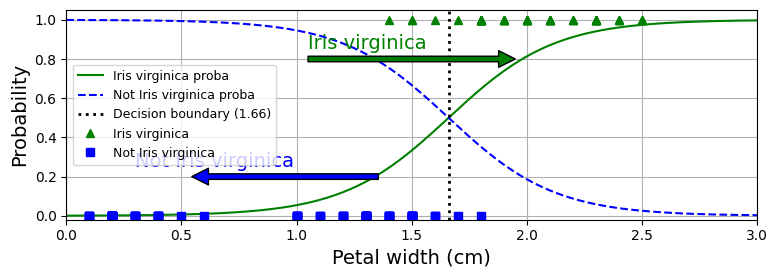

Batas Keputusan: 1.6607
Prediksi untuk petal width 1.7cm dan 1.5cm: [1 0]
Probabilitas untuk petal width 1.7cm: [[0.45713982 0.54286018]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 1. Load dataset dan siapkan fitur serta target
iris = datasets.load_iris()
X = iris.data[:, 3:]  # hanya gunakan petal width
y = (iris.target == 2).astype(np.int64)  # 1 jika Virginica, 0 lainnya

# 2. Latih model regresi logistik
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

# 3. Prediksi probabilitas untuk visualisasi
X_test = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_test)

# 4. Tentukan decision boundary (batas saat P(virginica) = 0.5)
decision_boundary = X_test[y_proba[:, 1] >= 0.5][0][0]

# 5. Plot sigmoid curve dan data asli
plt.figure(figsize=(8, 3))
plt.plot(X_test, y_proba[:, 1], "g-", label="Iris virginica proba")
plt.plot(X_test, y_proba[:, 0], "b--", label="Not Iris virginica proba")
plt.axvline(x=decision_boundary, color="k", linestyle=":", linewidth=2, label=f"Decision boundary ({decision_boundary:.2f})")

plt.plot(X[y == 1], y[y == 1], "g^", label="Iris virginica")
plt.plot(X[y == 0], y[y == 0], "bs", label="Not Iris virginica")

# Panah penjelas arah klasifikasi
plt.annotate('', xy=(2.0, 0.8), xytext=(1.0, 0.8),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.text(1.05, 0.85, "Iris virginica", color="green")

plt.annotate('', xy=(0.5, 0.2), xytext=(1.4, 0.2),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.text(0.3, 0.25, "Not Iris virginica", color="blue")

# Format plot
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left", fontsize=9)
plt.axis([0, 3, -0.02, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Prediksi dan probabilitas
X_sample = np.array([[1.7], [1.5]])
prediksi = log_reg.predict(X_sample)
proba_17 = log_reg.predict_proba([[1.7]])

# 7. Output tambahan
print(f"Batas Keputusan: {decision_boundary:.4f}")
print(f"Prediksi untuk petal width 1.7cm dan 1.5cm: {prediksi}")
print(f"Probabilitas untuk petal width 1.7cm: {proba_17}")


## Softmax Regression

Prediksi untuk (petal length=5, petal width=2): [2]
Probabilitas untuk setiap kelas: [[6.21626374e-07 5.73689802e-02 9.42630398e-01]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


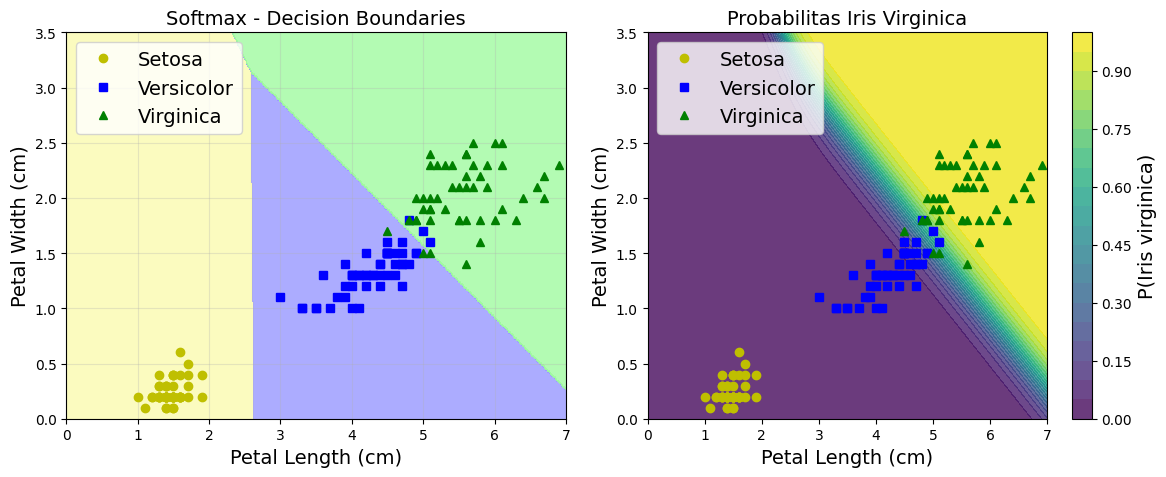

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import pandas as pd

# 1. Load data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Petal length & width
y = iris["target"]           # Multiclass: 0, 1, 2

# 2. Latih model Softmax
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

# 3. Prediksi input baru
new_input = [[5, 2]]
pred = softmax_reg.predict(new_input)
proba = softmax_reg.predict_proba(new_input)

print("Prediksi untuk (petal length=5, petal width=2):", pred)
print("Probabilitas untuk setiap kelas:", proba)

# 4. Grid untuk plot decision boundary
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = softmax_reg.predict(X_new).reshape(x0.shape)
y_proba = softmax_reg.predict_proba(X_new)[:, 2].reshape(x0.shape)  # Prob kelas 2

# 5. Visualisasi Decision Boundary
plt.figure(figsize=(12, 5))

# Plot Kiri: Decision Regions
plt.subplot(1, 2, 1)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, y_pred, cmap=custom_cmap, alpha=0.8)

# Data asli
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Virginica")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Softmax - Decision Boundaries")
plt.axis([0, 7, 0, 3.5])
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)

# Plot Kanan: Probabilitas Virginica
plt.subplot(1, 2, 2)
contour = plt.contourf(x0, x1, y_proba, levels=20, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='P(Iris virginica)')

plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Virginica")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Probabilitas Iris Virginica")
plt.axis([0, 7, 0, 3.5])
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


# **Proses Klasifikasi dengan Regresi Logistik**

### 1. Regresi Logistik Biner
Dataset yang digunakan adalah Iris, dengan fitur utama berupa petal width (lebar kelopak bunga) dalam satuan sentimeter.

Target klasifikasinya adalah membedakan antara Iris Virginica (label 1) dan bukan Virginica (label 0).

Model yang digunakan adalah LogisticRegression dengan solver 'lbfgs'.

Hasil:
Model berhasil menemukan batas keputusan (decision boundary) di sekitar nilai petal width 1.6 cm.

Contoh prediksi:

* Petal width = 1.7 → diprediksi sebagai Virginica (1)

* Petal width = 1.5 → diprediksi sebagai bukan Virginica (0)
Probabilitas yang dihasilkan mengikuti kurva sigmoid khas regresi logistik.

### 2. Visualisasi Probabilitas dan Batas Keputusan

* Plot kiri menunjukkan data asli dengan batas keputusan (garis putus-putus).

* Plot kanan menampilkan kurva sigmoid untuk probabilitas masing-masing kelas, yaitu P(Virginica) dan P(Bukan Virginica).
Visualisasi ini menggambarkan transisi probabilitas secara bertahap dari 0 ke 1, sesuai dengan sifat kurva sigmoid/logistic.

### 3. Regresi Logistik Multikelas (Softmax Regression)
Pada bagian ini digunakan model regresi logistik untuk klasifikasi tiga kelas (Setosa, Versicolor, dan Virginica), dengan fitur berupa petal length dan petal width.

Model yang digunakan adalah LogisticRegression dengan parameter multi_class="multinomial" dan solver="lbfgs".

Hasil:
Contoh prediksi untuk data dengan petal length = 5 dan petal width = 2 menghasilkan prediksi kelas Virginica.
Model juga memberikan probabilitas untuk ketiga kelas secara proporsional dan konsisten.

### 4. Visualisasi Batas Keputusan dan Kontur Probabilitas

* Plot kiri menampilkan wilayah keputusan (decision boundaries) untuk masing-masing kelas dengan warna yang berbeda.

* Plot kanan menunjukkan kontur probabilitas khusus untuk kelas Virginica.
Setiap wilayah menggambarkan bagaimana model memutuskan kelas berdasarkan nilai fitur yang dimasukkan.

# **Kesimpulan**
Regresi logistik terbukti efektif untuk tugas klasifikasi, baik biner maupun multikelas, pada dataset seperti Iris.
Dalam kasus biner, model mampu mengidentifikasi batas keputusan yang jelas di sekitar petal width 1.6 cm.
Sementara itu, pada klasifikasi multikelas menggunakan softmax regression, model menunjukkan akurasi yang baik dengan distribusi probabilitas yang logis.
Visualisasi batas keputusan dan kontur probabilitas sangat membantu dalam memahami cara kerja model dan proses pengambilan keputusannya.
Dengan hanya dua fitur sederhana, model sudah dapat memisahkan ketiga kelas secara akurat dan intuitif.